<a href="https://colab.research.google.com/github/UdayLab/Hands-on-Pattern-Mining/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3: Transactional Databases - Representation, Creation, and Statistics**

## Installing the PAMI Library

In [ ]:
!pip install pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.0 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=e246f22810e716ad267c1b94a608b96c4a8e426206a7281014877f65905f23b1
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filena

## Creating Synthetic Transactional Databases

Generic

```python
from PAMI.extras.syntheticDataGenerator import TransactionalDatabase as db
  
obj = db.TransactionalDatabase(
        databaseSize=numberOfTransactions,
        avgItemsPerTransaction=averageNumberOfItemsInTransaction,
        numItems=totalNumberOfItemsInADatabase,
        sep='\t' #default seperator
        )
obj.create() #creating the synthetic transactional database
obj.save(outputFileName) #save the file
transactionalDataFrame=obj.getTransactions() #reading the transactions into a dataframe

#printing stats
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 1

In [ ]:
from PAMI.extras.syntheticDataGenerator import TransactionalDatabase as db

obj = db.TransactionalDatabase(
        databaseSize=100000,
        avgItemsPerTransaction=10,
        numItems=1000,
        sep='\t'
        )
obj.create()
obj.save('transactionalDatabase.csv')
#read the generated transactions into a dataframe
transactionalDataFrame=obj.getTransactions()
#stats
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 22.366119146347046
Memory (RSS): 209805312
Memory (USS): 187228160


## Deriving a Transactional Database from a DataFrame

### Generic



```python
from PAMI.extras.convert import DF2DB as alg

#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(oFile='outputFileName.csv',
       condition='>=|>|==|!=|<=|<', thresholdValue=value
     )
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [ ]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 1000 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(1000, 4))
dataFrame = pd.DataFrame(data,
             columns=['Item1', 'Item2', 'Item3', 'Item4']
            )
#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(oFile='transactionalDB.csv',
       condition='>=', thresholdValue=36
     )
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.02968001365661621
Memory (RSS): 209805312
Memory (USS): 187592704


## Knowing the Statistical Details

### Generic


#### *Detailed version*
```python
from PAMI.extras.dbStats import TransactionalDatabase as stat

obj = stat.TransactionalDatabase("transactionalDatabase.csv")
obj.run()
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()')
print(f'Database sparsity :{obj.getSparsity()}')
```

#### *Simplified version*

```python
from PAMI.extras.dbStats import TransactionalDatabase as stat

obj = stat.TransactionalDatabase("transactionalDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()
```

### Example 3

Database size (total no of transactions) : 100000
Number of items : 1000
Minimum Transaction Size : 1
Average Transaction Size : 10.02603
Maximum Transaction Size : 20
Standard Deviation Transaction Size : 5.7165105124630005
Variance in Transaction Sizes : 32.67881922729227
Sparsity : 0.98997397


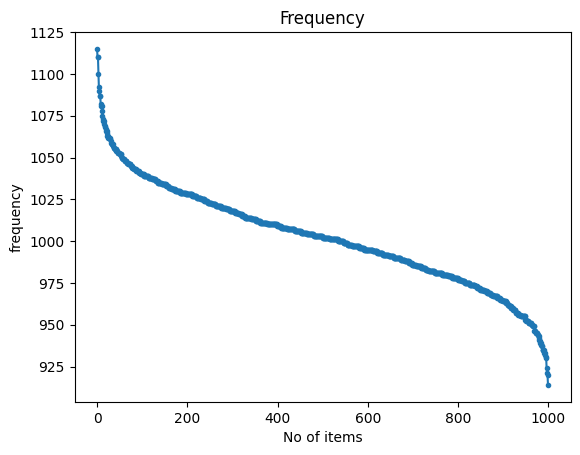

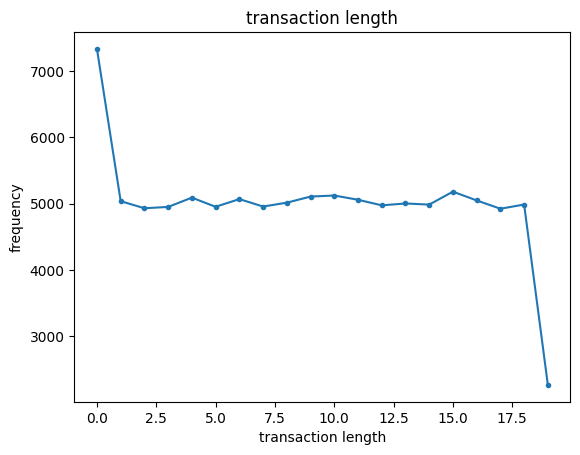

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as stat

obj = stat.TransactionalDatabase("transactionalDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()